In [1]:
#Dataset/Dataloader 실습

In [2]:
#Dataset=data와 label저장
#Dataloader=iterable한 객체로 감싸줘서 모델에 공급될 수 있도록 데이터 불러옴

In [3]:
#library import

import torch
import torchvision.transforms as transforms

In [4]:
import torchvision

In [5]:
# 고정
torch.manual_seed(42)

In [6]:
###########data Transform

transform = transforms.Compose( 
    [transforms.ToTensor(), #이미지가 0~1사이 값으로 변경->파이토치를 사용해서 분석을 진행하기 위해서는 이미지를 텐서로 변환하여 모델에 적용
     transforms.Normalize((0.5), (0.5))] #-1~1사이의 값으로 정규화 시킴 이미지마다 명도,채도등 다르기때문에 이미지를 동일한 환경에 맞춰줌 #channel이 한개이기 때문에 한개의 채널에만 적용
)

In [7]:
##Dataset 저장

train_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform #tensor로 변환
)

test_data=torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform #tensor로 변환
)

In [8]:
##EDA
import matplotlib.pyplot as plt

In [9]:
dir(train_data) #변수확인&매소드확인

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [10]:
train_data[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [11]:
#train data
print(train_data.classes) #클래스확인
print(type(train_data))
print(train_data.data[1,1])
print(train_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
tensor([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
        255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
       dtype=torch.uint8)
torch.Size([60000, 28, 28])


In [12]:
trainclass=train_data.classes
trainclass[0]

'T-shirt/top'

In [13]:
#Data EDA
#class dictionary
labels_map={
    0: trainclass[0],
    1: trainclass[1],
    2: trainclass[2],
    3: trainclass[3],
    4: trainclass[4],
    5: trainclass[5],
    6: trainclass[6],
    7: trainclass[7],
    8: trainclass[8],
    9: trainclass[9],
}

print(labels_map)
print(labels_map[0])

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
T-shirt/top


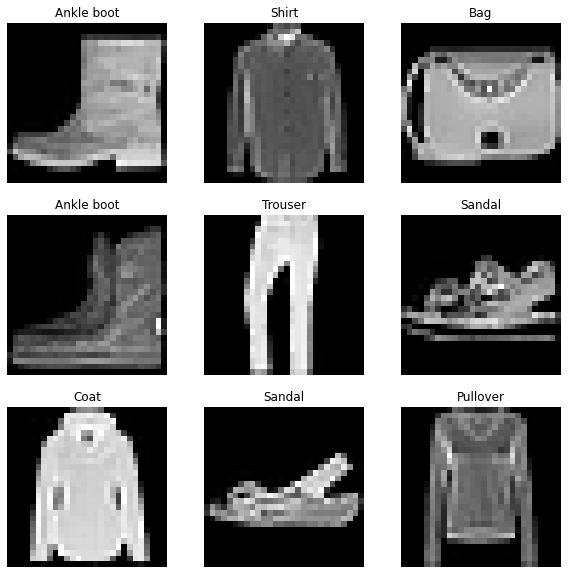

In [14]:
figure=plt.figure(figsize=(10,10)) #plt.figure()는 새로운 figure를 생성해준다

cols, rows= 3,3

for i in range(1,cols*rows+1):
    sample_idx=torch.randint(len(train_data),size=(1,)).item() #1~60000중 랜덤숫자 추출
    img, label= train_data[sample_idx] #첫번째 텐서값을 이미지, 두번째 정수값을->라벨값으로
    figure.add_subplot(rows,cols,i) #figure.add_subplot(3,3,1),,,figure.add_subplot(3,3,9) 순서대로 이미지 나타내줌 key, value값
    plt.title(labels_map[label]) #해당라벨에대해서 label_map dic에서 텍스트값 추출
    plt.axis('off') #axis제거
    plt.imshow(img.squeeze(),cmap='gray') #squeeze->차원이 1인 차원을 제거해줌, cmap='이미지컬러' ex) x=torch.ones(10,5,1,3,1)->x.squeeze()->torch.ones(10,5,3)으로 바꿔줌 바꿔주는 이유는? 차원을 축소하여 그래프를 알맞게 그리기 위함.
plt.show()

In [15]:
##test data
print(test_data.classes) #클래스확인
print(type(test_data))
print(test_data.data[1,1])
print(test_data.data.size()) #train set은 6만개의 28x28사이즈 이미지로 구성됨

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
<class 'torchvision.datasets.mnist.FashionMNIST'>
tensor([  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237, 255,
        255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,   0,   0],
       dtype=torch.uint8)
torch.Size([10000, 28, 28])


In [16]:
##################train test class별 개수 구하기

train_class_count=dict()


for train_item in train_data:
    label=train_data.classes[train_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in train_class_count: #
        train_class_count[label]=1
    else:
        train_class_count[label] +=1
        
train_class_count

{'Ankle boot': 6000,
 'T-shirt/top': 6000,
 'Dress': 6000,
 'Pullover': 6000,
 'Sneaker': 6000,
 'Sandal': 6000,
 'Trouser': 6000,
 'Shirt': 6000,
 'Coat': 6000,
 'Bag': 6000}

In [17]:
##################train test class별 개수 구하기

test_class_count=dict()


for test_item in test_data:
    label=test_data.classes[test_item[1]] #차례대로 첫번째부터 라벨값 추출
    if label not in test_class_count: #
        test_class_count[label]=1
    else:
        test_class_count[label] +=1
        
test_class_count

{'Ankle boot': 1000,
 'Pullover': 1000,
 'Trouser': 1000,
 'Shirt': 1000,
 'Coat': 1000,
 'Sandal': 1000,
 'Sneaker': 1000,
 'Dress': 1000,
 'Bag': 1000,
 'T-shirt/top': 1000}

In [18]:
'''
train data-> class별로 6000개
test data-> class별로 1000개
'''

'\ntrain data-> class별로 6000개\ntest data-> class별로 1000개\n'

In [19]:
#DATA LOADER

In [20]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2) 
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2) 

In [24]:
#Dataloader EDA
#DataLoader를 통해 반복하기->이미지, 라벨 뽑아내기 EDA
#이미지와 라벨값을 표시

train_images, train_labels = next(iter(trainloader))
print(train_images)
print(train_labels)
###batch size-> 64개에 대한 텐서값, 라벨값 추출

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

In [25]:
print(f"Feature batch shape: {train_images.size()}") #f'문자열 {변수} 문자열' f-string 64x1x28x28->(batch_size,channel,image height,image weight
print(f"Labels batch shape: {train_labels.size()}")
img=train_images[0].squeeze() #channel=1 이기때문에 1인차원을 scalar로 변환 채널을 없애야함. 채널을 없애줘야 화면에 그릴수 있음
label= train_labels[0] 
#이미지별 라벨별 사이즈. 이미지는 64x1x28x28 label=64개
print(img)
print(label)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1

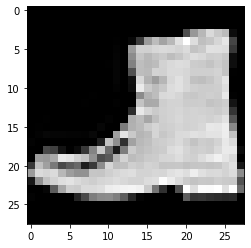

Label:9
Class name:Ankle boot


In [26]:
plt.imshow(img,cmap='gray')
plt.show()
print(f'Label:{label}')
labeling=int(label)
print(f'Class name:{labels_map[labeling]}')

In [27]:
############내가 이미지를 가지고있는경우
###########Custom dataset만들기

In [29]:
from torch.utils.data import Dataset, DataLoader

In [35]:
import numpy as np

In [39]:
# Custom dataset, Transform, DataLoader 생성

class Customdataset(Dataset):
    def __init__(self,np_data,transform=None):
        self.data=np_data
        self.transform=transform
        self.len=np_data.shape[0]
    def __len__(self): #데이터 개수 리턴
        return self.len
    def __getitem__(self,idx): #index에 해당하는 데이터를 리턴해줌
        sample=self.data[idx]
        if self.transform: #데이터 변환까지 하고 가져오기
            sample = self.transform(sample)
        return sample

In [40]:
#transform 생성

def square(sample):
    return sample**2

In [41]:
transform1=transforms.Compose([square])

In [50]:
np_data = np.arange(12)
np_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [51]:
custom_dataset=Customdataset(np_data,transform=transform1)

In [52]:
print(type(custom_dataset))
print(custom_dataset[0])
print(len(custom_dataset))

<class '__main__.Customdataset'>
0
12


In [53]:
custom_dataloader=DataLoader(custom_dataset,batch_size=2,shuffle=True)

In [56]:
print(type(custom_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [58]:
for epoch in range(3): #epoch
    for data in custom_dataloader:
        print(data)
    print("=="*20)

tensor([81, 25], dtype=torch.int32)
tensor([64, 16], dtype=torch.int32)
tensor([ 49, 121], dtype=torch.int32)
tensor([36,  0], dtype=torch.int32)
tensor([100,   4], dtype=torch.int32)
tensor([9, 1], dtype=torch.int32)
tensor([4, 9], dtype=torch.int32)
tensor([64,  1], dtype=torch.int32)
tensor([ 16, 121], dtype=torch.int32)
tensor([25,  0], dtype=torch.int32)
tensor([36, 49], dtype=torch.int32)
tensor([100,  81], dtype=torch.int32)
tensor([49,  4], dtype=torch.int32)
tensor([81,  9], dtype=torch.int32)
tensor([64, 25], dtype=torch.int32)
tensor([100,   0], dtype=torch.int32)
tensor([ 1, 36], dtype=torch.int32)
tensor([121,  16], dtype=torch.int32)
